In [180]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats 
import os 
import random

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Lendo as bases

In [182]:
df_german = pd.read_csv('german_credit_data.csv', index_col = 'Unnamed: 0')
df_german_target = pd.read_csv('german_credit_data_TARGET.csv', index_col= 'Unnamed: 0')

In [183]:
df_german.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [184]:
df_german_target.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Análise exploratória

In [185]:
df_german_target

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


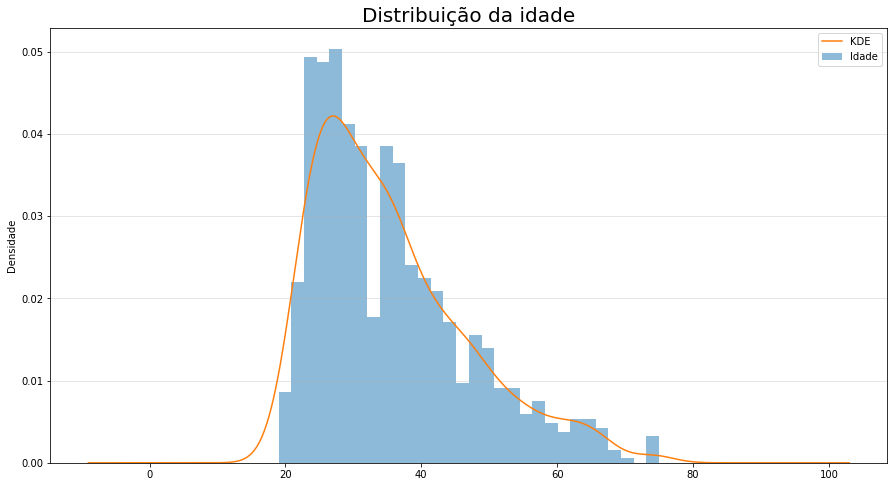

In [186]:
# Idade
fig, ax = plt.subplots(figsize = (15,8))
df_german.Age.plot.hist(density = True, bins = 30, alpha = 0.5, label = 'Idade')

df_german.Age.plot.kde(label = 'KDE')

plt.title("Distribuição da idade", fontdict = {'fontsize':20})
plt.grid(axis = 'y', alpha = 0.4)
plt.ylabel('Densidade')
plt.legend()
plt.show()

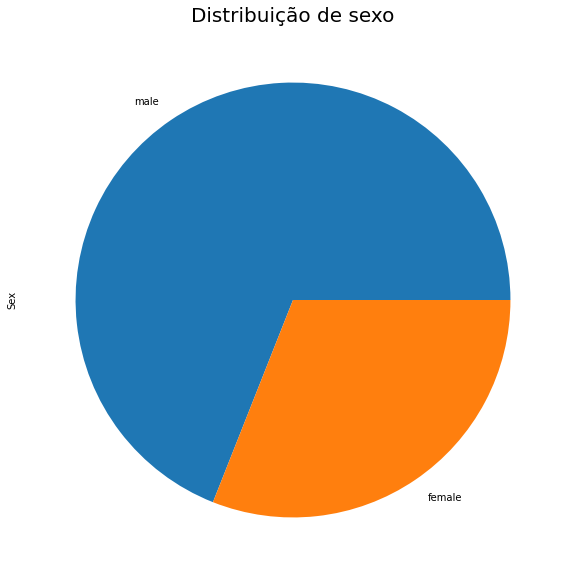

In [187]:
# Sex
plt.figure(figsize= (10,10))
df_german.Sex.value_counts(normalize = True).plot.pie()
plt.title("Distribuição de sexo", fontdict={'fontsize':20});
 

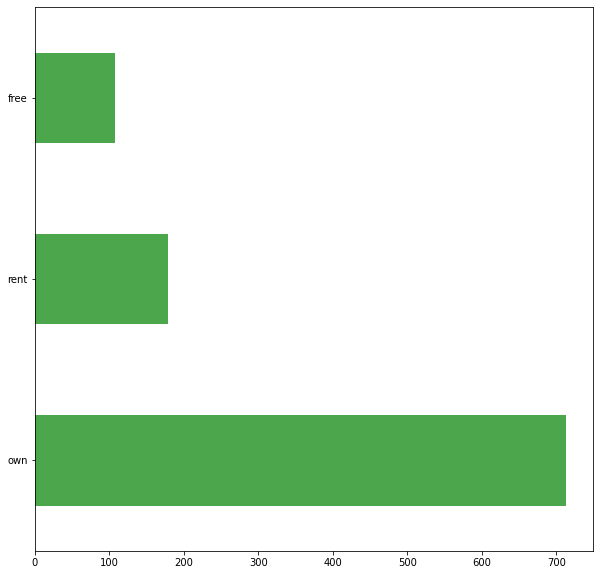

In [188]:
df_german.Housing.value_counts().plot.barh(color = 'green', alpha = 0.7, figsize=(10,10));

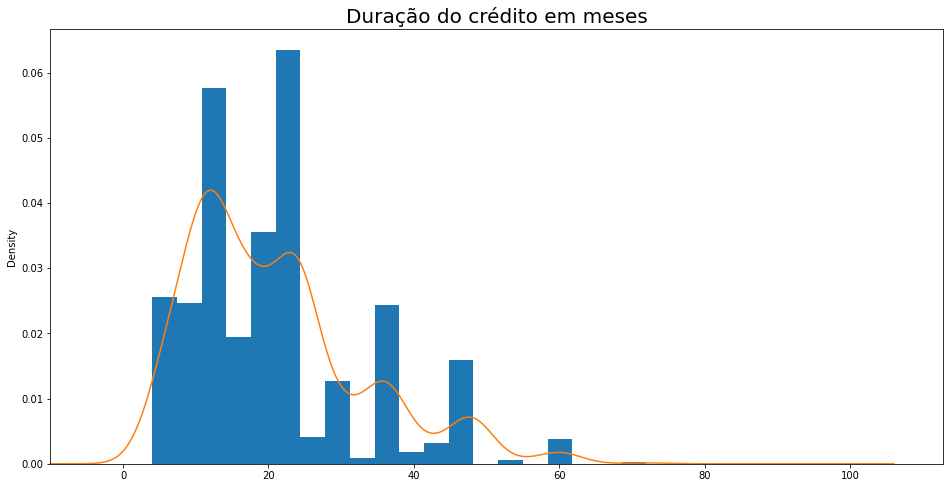

In [189]:
fig, ax = plt.subplots()
df_german.Duration.plot.hist(density=True,figsize=(16,8), bins = 20)
df_german.Duration.plot.kde()
plt.title('Duração do crédito em meses', fontdict={'fontsize':20})
plt.xlim(-10);

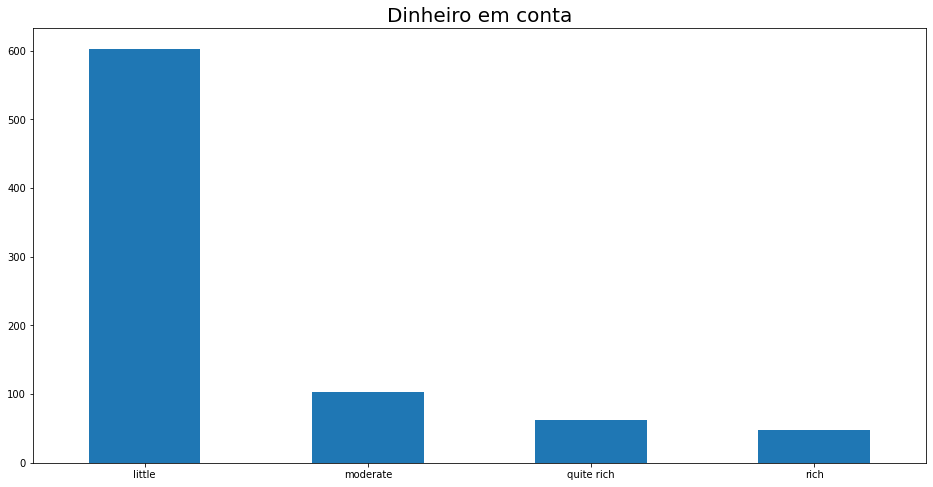

In [190]:
df_german['Saving accounts'].value_counts().plot.bar(figsize=(16,8))
plt.title('Dinheiro em conta', fontdict={'fontsize':20})
plt.xticks(rotation =0);

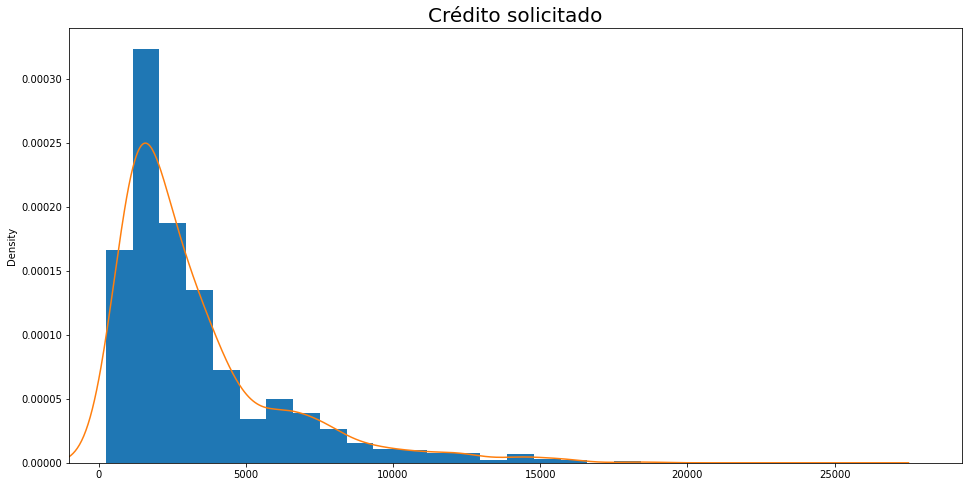

In [191]:
fig, ax = plt.subplots()

df_german['Credit amount'].plot.hist(density = True,figsize=(16,8), bins =20)

df_german['Credit amount'].plot.kde()

plt.title('Crédito solicitado', fontdict={'fontsize':20})
plt.xlim(-1000);

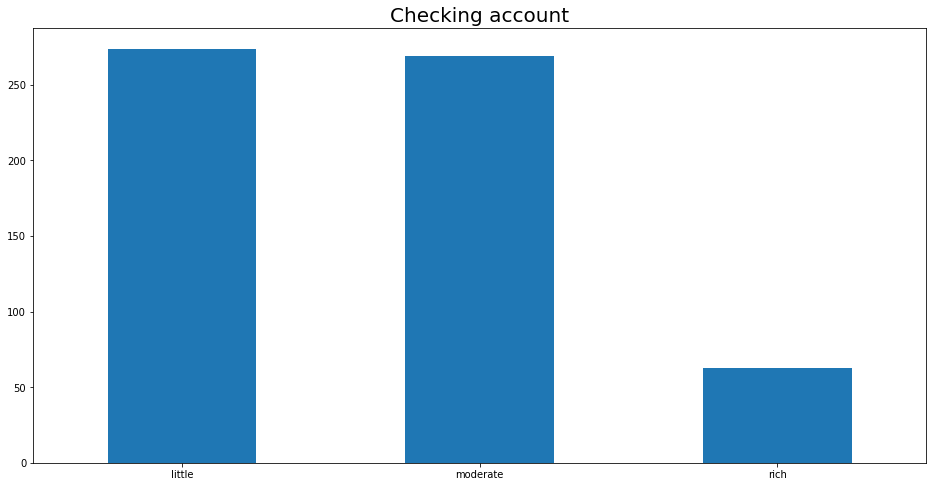

In [192]:
df_german['Checking account'].value_counts().plot.bar(figsize=(16,8))
plt.title('Checking account', fontdict={'fontsize':20})
plt.xticks(rotation =0);

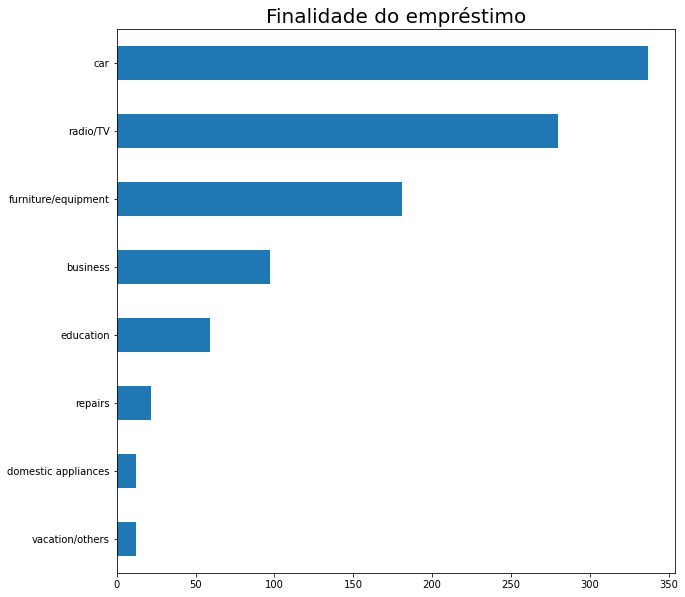

In [193]:
df_german.Purpose.value_counts(ascending=True).plot.barh(figsize=(10,10))
plt.title("Finalidade do empréstimo", fontdict={'fontsize':20});

# Comparando *features* em relação a variável *target*

In [194]:
df_good_risk = df_german_target.query("Risk == 'good'")
df_bad_risk = df_german_target.query("Risk == 'bad'")

# Numéricas

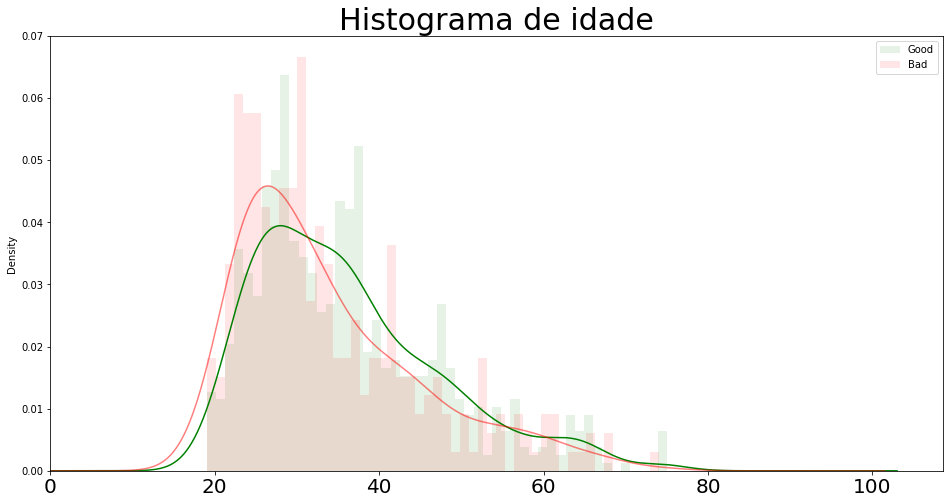

In [195]:
fig, ax = plt.subplots(figsize=(16,8))

df_german_target.query("Risk == 'good'").Age.plot.hist(density = True,bins = 50, label = 'Good', alpha = 0.1, color = 'green')
df_german_target.query("Risk == 'good'").Age.plot.kde(label = '', color = 'green')
df_german_target.query("Risk == 'bad'").Age.plot.hist(density = True, bins = 50, label = 'Bad', alpha = 0.1, color = 'red')
df_german_target.query("Risk == 'bad'").Age.plot.kde(label = '', alpha = 0.5, color = 'red')
plt.title('Histograma de idade', fontdict={'fontsize':30})
plt.xlim(0)
plt.xticks(fontsize=20)
plt.legend();


''

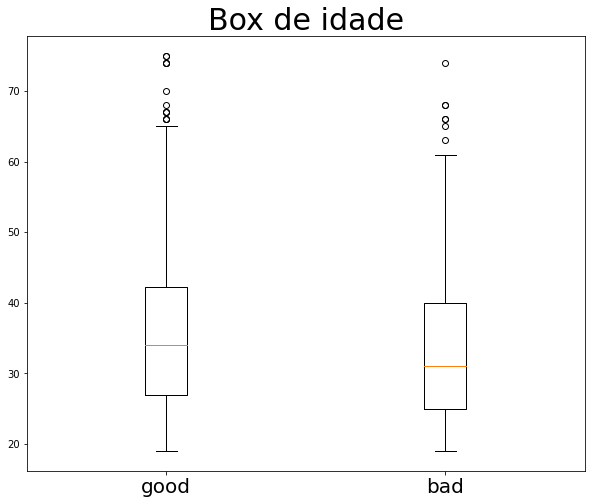

In [196]:
fig, ax = plt.subplots(figsize=(10,8))

ax.boxplot([df_german_target.query("Risk == 'good'").Age,df_german_target.query("Risk == 'bad'").Age], labels = ['good','bad'])
plt.title('Box de idade', fontdict={'fontsize':30})
plt.xticks(fontsize=20)
;


### Teste de Kolmogorov-Smirnov 

In [197]:
stats.kstest(df_good_risk.Age,df_bad_risk.Age, alternative ='less')[1]

0.0006415242084319726

### Teste de normalidade de Shapiro

In [198]:
## Distribuição GOOD
stats.shapiro(df_good_risk.Age)

ShapiroResult(statistic=0.9257624745368958, pvalue=4.248232121998308e-18)

In [199]:
## Distribuição BAD
stats.shapiro(df_bad_risk.Age)

ShapiroResult(statistic=0.8903005123138428, pvalue=6.929747980955955e-14)

In [200]:
## Distribuição TOTAL
stats.shapiro(df_german_target.Age)

ShapiroResult(statistic=0.9174707531929016, pvalue=6.381270673909361e-23)

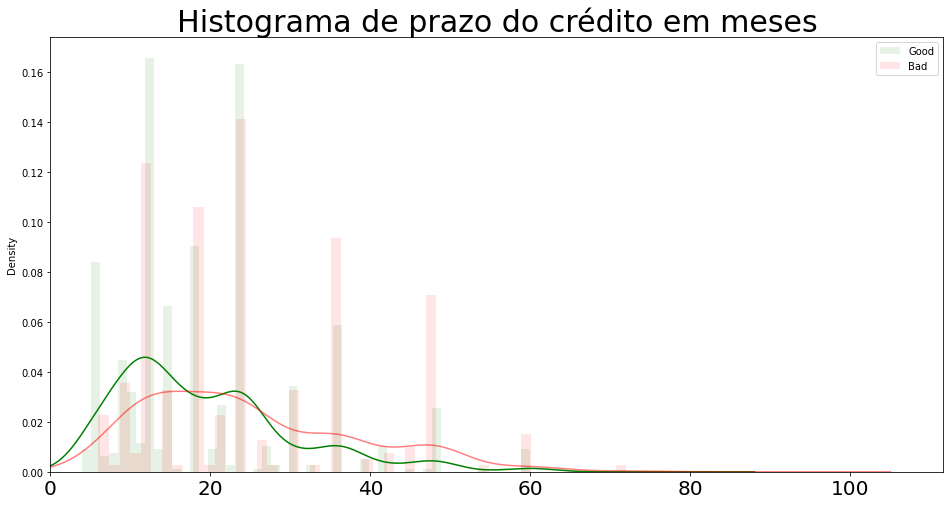

In [201]:
fig, ax = plt.subplots(figsize=(16,8))

df_german_target.query("Risk == 'good'").Duration.plot.hist(density = True,bins = 50, label = 'Good', alpha = 0.1, color = 'green')
df_german_target.query("Risk == 'good'").Duration.plot.kde(label = '', color = 'green')
df_german_target.query("Risk == 'bad'").Duration.plot.hist(density = True, bins = 50, label = 'Bad', alpha = 0.1, color = 'red')
df_german_target.query("Risk == 'bad'").Duration.plot.kde(label = '', alpha = 0.5, color = 'red')
plt.title('Histograma de prazo do crédito em meses', fontdict={'fontsize':30})
plt.xlim(0)
plt.xticks(fontsize=20)
plt.legend();

(array([1, 2]), [Text(0, 0, ''), Text(0, 0, '')])

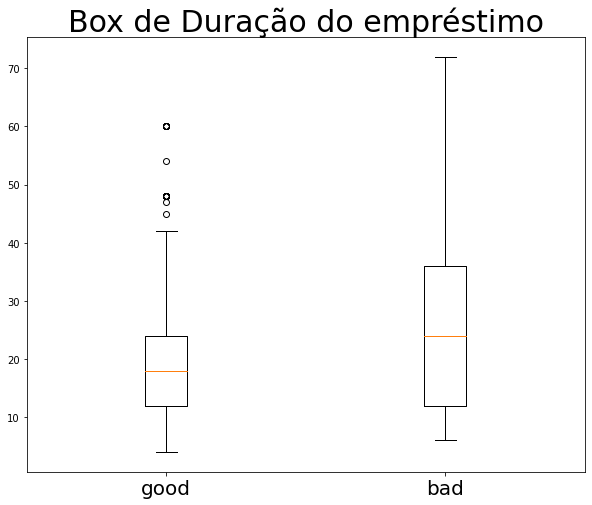

In [202]:
fig, ax = plt.subplots(figsize=(10,8))

ax.boxplot([df_german_target.query("Risk == 'good'").Duration,df_german_target.query("Risk == 'bad'").Duration], labels = ['good','bad'])
plt.title('Box de Duração do empréstimo', fontdict={'fontsize':30})
plt.xticks(fontsize=20)

### Teste de Kolmogorov-Smirnov 

In [203]:
stats.kstest(df_german_target.query("Risk == 'good'").Duration,df_german_target.query("Risk == 'bad'").Duration, alternative='greater')

KstestResult(statistic=0.1919047619047619, pvalue=1.5611000584100443e-07)

In [204]:
stats.kstest(df_good_risk['Duration'], 'gamma' ,(df_good_risk['Duration'].mean(), df_good_risk['Duration'].std()))

KstestResult(statistic=0.756752236242635, pvalue=0.0)

### Teste de normalidade de Shapiro

In [205]:
## Distribuição GOOD
stats.shapiro(df_good_risk['Duration'])

ShapiroResult(statistic=0.8940441012382507, pvalue=1.5308098048867915e-21)

In [206]:
## Distribuição BAD
stats.shapiro(df_bad_risk['Duration'])

ShapiroResult(statistic=0.9160704016685486, pvalue=6.4779227988698285e-12)

In [207]:
## Distribuição TOTAL
stats.shapiro(df_german_target['Duration'])

ShapiroResult(statistic=0.8997892737388611, pvalue=4.908141189598946e-25)

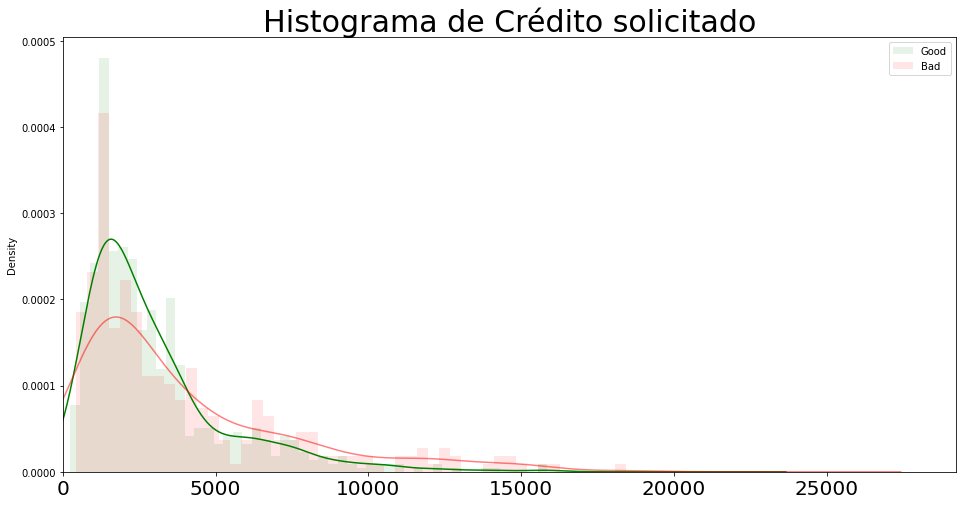

In [208]:
fig, ax = plt.subplots(figsize=(16,8))

df_german_target.query("Risk == 'good'")['Credit amount'].plot.hist(density = True,bins = 50, label = 'Good', alpha = 0.1, color = 'green')
df_german_target.query("Risk == 'bad'")['Credit amount'].plot.hist(density = True, bins = 50, label = 'Bad', alpha = 0.1, color = 'red')
df_german_target.query("Risk == 'good'")['Credit amount'].plot.kde(label = '', color = 'green')
df_german_target.query("Risk == 'bad'")['Credit amount'].plot.kde(label = '', alpha = 0.5, color = 'red')
plt.title('Histograma de Crédito solicitado', fontdict={'fontsize':30})
plt.xlim(0)
plt.xticks(fontsize=20)
plt.legend();

(array([1, 2]), [Text(0, 0, ''), Text(0, 0, '')])

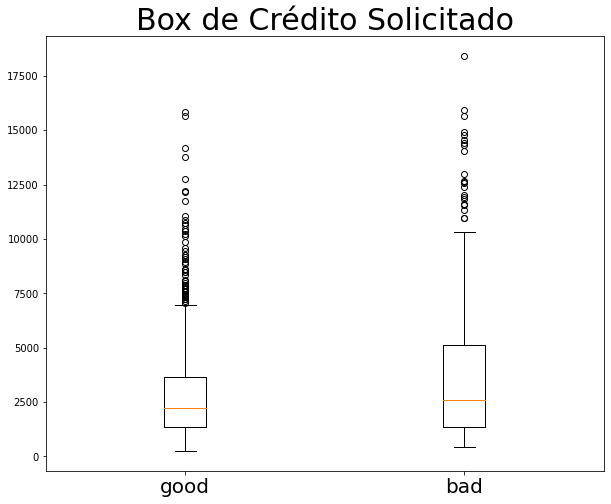

In [209]:
fig, ax = plt.subplots(figsize=(10,8))

ax.boxplot([df_german_target.query("Risk == 'good'")['Credit amount'],df_german_target.query("Risk == 'bad'")['Credit amount']], labels = ['good','bad'])
plt.title('Box de Crédito Solicitado', fontdict={'fontsize':30})
plt.xticks(fontsize=20)

### Teste de Kolmogorov-Smirnov 

In [210]:
stats.kstest(df_german_target.query("Risk == 'good'")['Credit amount'],df_german_target.query("Risk == 'bad'")['Credit amount'], alternative='greater')

KstestResult(statistic=0.15714285714285714, pvalue=2.742044737631118e-05)

### Teste de normalidade de Shapiro

In [211]:
## Distribuição GOOD
stats.shapiro(df_good_risk['Credit amount'])

ShapiroResult(statistic=0.8081037998199463, pvalue=5.184644336301757e-28)

In [212]:
## Distribuição BAD
stats.shapiro(df_bad_risk['Credit amount'])

ShapiroResult(statistic=0.8138673901557922, pvalue=2.841709511254472e-18)

In [213]:
## Distribuição TOTAL
stats.shapiro(df_german_target['Credit amount'])

ShapiroResult(statistic=0.7933971881866455, pvalue=8.609912964372653e-34)

## Correlação de Spearman

In [214]:
## Colocando Target como numérica
df_german_target['Target'] = pd.factorize(df_german_target.Risk, sort =True)[0]

df_german_target

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0
2,49,male,1,own,little,NaN,2096,12,education,good,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
4,53,male,2,free,little,little,4870,24,car,bad,0
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,1
996,40,male,3,own,little,little,3857,30,car,good,1
997,38,male,2,own,little,NaN,804,12,radio/TV,good,1
998,23,male,2,free,little,little,1845,45,radio/TV,bad,0


In [215]:
df_german_target[['Age','Job','Credit amount', 'Duration','Target']].corr(method = 'spearman')['Target'].sort_values()

Duration        -0.205685
Credit amount   -0.087083
Job             -0.035330
Age              0.112191
Target           1.000000
Name: Target, dtype: float64

# Classes

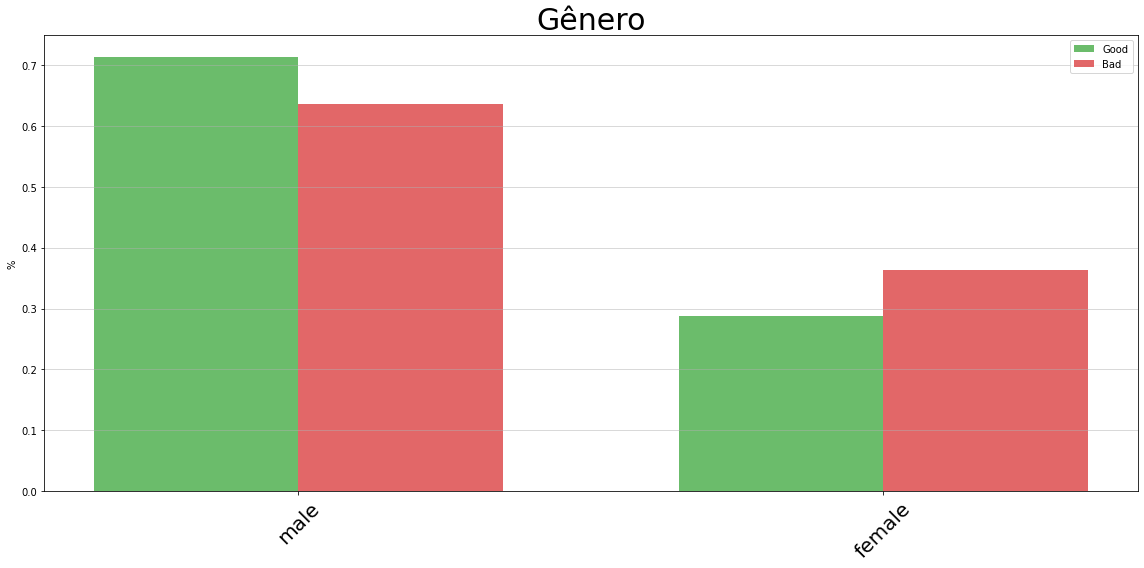

In [216]:
labels = df_good_risk.Sex.value_counts().index
good = df_good_risk.Sex.value_counts(normalize= True).values
total = df_bad_risk.Sex.value_counts().values.sum()
bad = [191/total,109/total]

width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (16,8))

rects1 = ax.bar(x - width/2, good, width, label='Good', color ='tab:green', alpha = 0.7)
rects2 = ax.bar(x + width/2, bad, width, label='Bad', color = 'tab:red', alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Gênero', fontdict={'fontsize':30})
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'fontsize':20}, rotation = 45)
ax.legend()
plt.ylabel("%")

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)


fig.tight_layout()
plt.grid(axis='y', alpha = 0.6)
plt.show()

### Teste de Chi-Quadrado

In [217]:
## CRIAÇÃO DA TABELA DE FREQUÊNCIA

x = df_good_risk['Sex'].value_counts()
x.name ='good'
y = df_bad_risk['Sex'].value_counts()
y.name ='bad'


freq_table = pd.DataFrame([x,y])


print(freq_table)

      male  female
good   499     201
bad    191     109


In [218]:
stats.chisquare(freq_table)

Power_divergenceResult(statistic=array([137.48405797,  27.30322581]), pvalue=array([9.44988744e-32, 1.73921019e-07]))

Text(0.5, 1.0, 'p-valor')

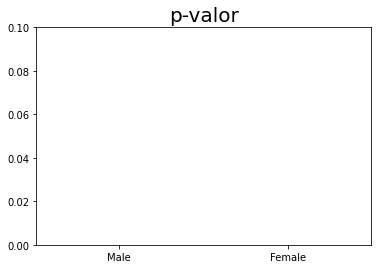

In [219]:
plt.bar(['Male','Female'],stats.chisquare(freq_table)[1])
plt.ylim(top = 0.1)
plt.title('p-valor', fontsize = 20)

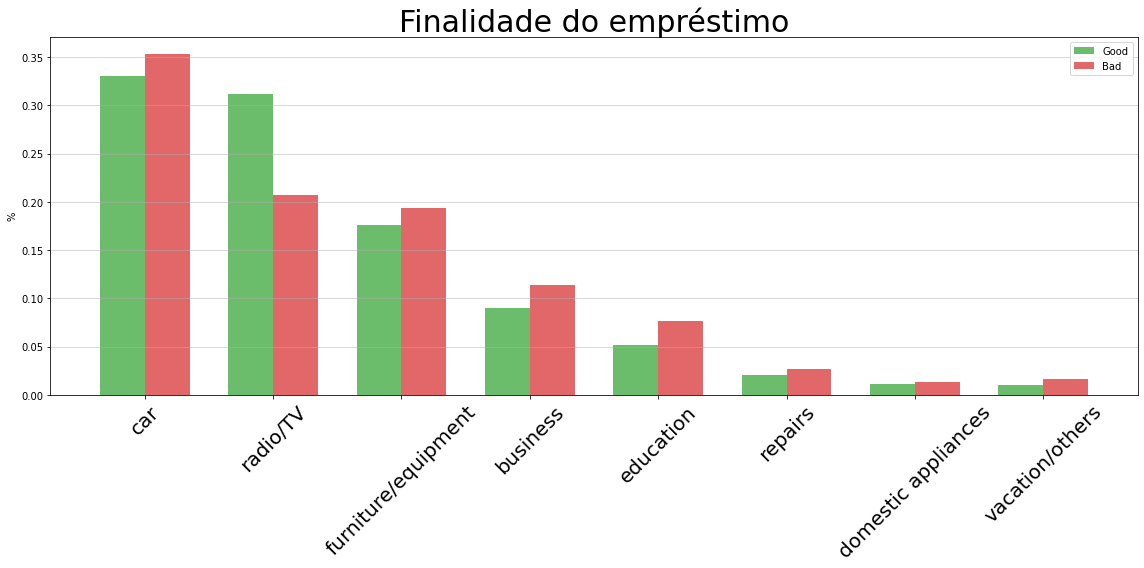

In [220]:
labels = df_german_target.query("Risk == 'good'").Purpose.value_counts().index
good = df_german_target.query("Risk == 'good'").Purpose.value_counts(normalize= True).values
total = df_german_target.query("Risk == 'bad'").Purpose.value_counts().values.sum()
bad = [106/total,62/total,58/total,34/total,23/total,8/total,4/total,5/total]

width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (16,8))

rects1 = ax.bar(x - width/2, good, width, label='Good', color ='tab:green', alpha = 0.7)
rects2 = ax.bar(x + width/2, bad, width, label='Bad', color = 'tab:red', alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Finalidade do empréstimo', fontdict={'fontsize':30})
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'fontsize':20}, rotation = 45)
ax.legend()
plt.ylabel("%")


fig.tight_layout()
plt.grid(axis='y', alpha = 0.6)
plt.show()

### Teste de Chi-Quadrado

In [221]:
## CRIAÇÃO DA TABELA DE FREQUÊNCIA

x = df_good_risk['Purpose'].value_counts()
x.name ='good'
y = df_bad_risk['Purpose'].value_counts()
y.name ='bad'


freq_table = pd.DataFrame([x,y])


freq_table

,car,radio/TV,furniture/equipment,business,education,repairs,domestic appliances,vacation/others
good,231,218,123,63,36,14,8,7
bad,106,62,58,34,23,8,4,5


In [222]:
## Cálculo do Chi-Quadrado

stats.chisquare(freq_table)

Power_divergenceResult(statistic=array([46.36498516, 86.91428571, 23.34254144,  8.67010309,  2.86440678,
        1.63636364,  1.33333333,  0.33333333]), pvalue=array([9.81539556e-12, 1.13327811e-20, 1.35568171e-06, 3.23472892e-03,
       9.05590927e-02, 2.00825123e-01, 2.48213079e-01, 5.63702862e-01]))

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

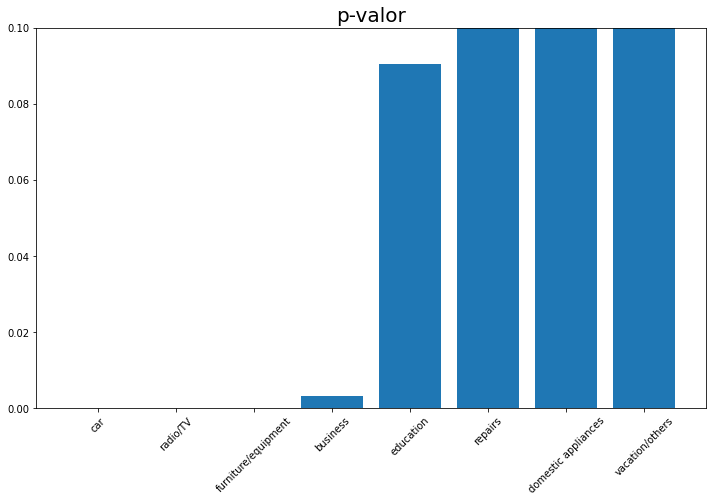

In [223]:
plt.figure(figsize=(12,7))
plt.bar(freq_table.columns,stats.chisquare(freq_table)[1])
plt.ylim(top = 0.1)
plt.title('p-valor', fontsize = 20)
plt.xticks(rotation = 45)

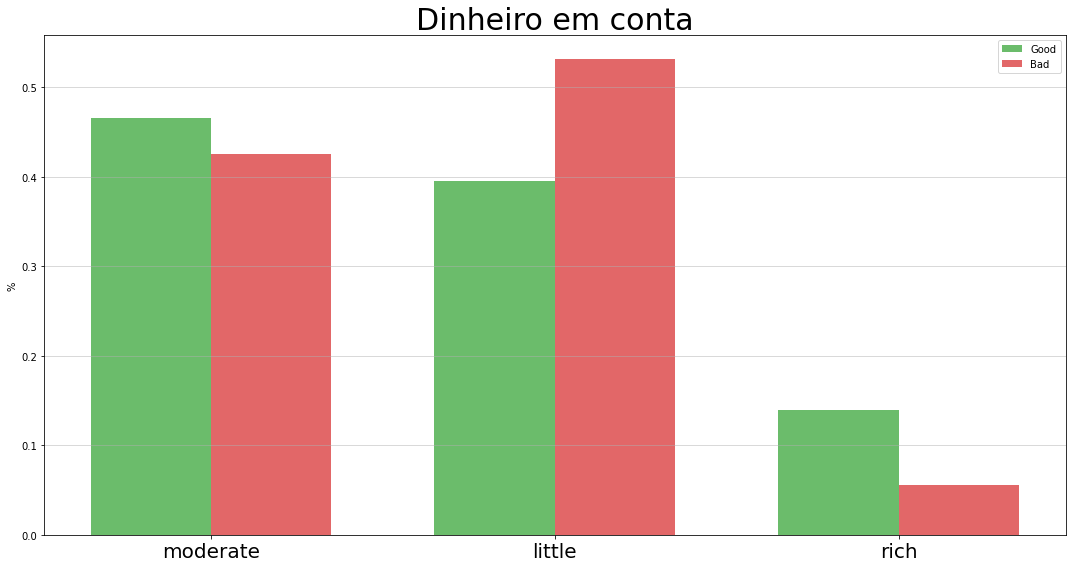

In [224]:
labels = df_german_target.query("Risk == 'good'")['Checking account'].value_counts().index
good = df_german_target.query("Risk == 'good'")['Checking account'].value_counts(normalize=True).values
total = df_german_target.query("Risk == 'bad'")['Checking account'].value_counts().values.sum()
bad = [108/total, 135/total,14/total]

width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (15,8))

rects1 = ax.bar(x - width/2, good, width, label='Good', color ='tab:green', alpha = 0.7)
rects2 = ax.bar(x + width/2, bad, width, label='Bad', color = 'tab:red', alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('%')
ax.set_title('Dinheiro em conta', fontdict={'fontsize':30})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_xticklabels(labels, fontdict={'fontsize':20})


fig.tight_layout()
plt.grid(axis='y', alpha = 0.6)
plt.show()

### Teste de Chi-Quadrado

In [225]:
## CRIAÇÃO DA TABELA DE FREQUÊNCIA

x = df_good_risk['Checking account'].value_counts()
x.name ='good'
y = df_bad_risk['Checking account'].value_counts()
y.name ='bad'


freq_table = pd.DataFrame([x,y])


freq_table

,moderate,little,rich
good,164,139,49
bad,105,135,14


In [226]:
## Cálculo do Chi-Quadrado

stats.chisquare(freq_table)

Power_divergenceResult(statistic=array([12.94052045,  0.05839416, 19.44444444]), pvalue=array([3.21545604e-04, 8.09052277e-01, 1.03568654e-05]))

Text(0.5, 1.0, 'p-valor')

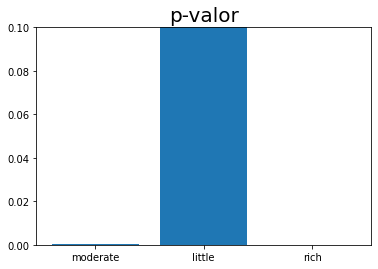

In [227]:
plt.bar(freq_table.columns,stats.chisquare(freq_table)[1])
plt.ylim(top = 0.1)
plt.title('p-valor', fontsize = 20)

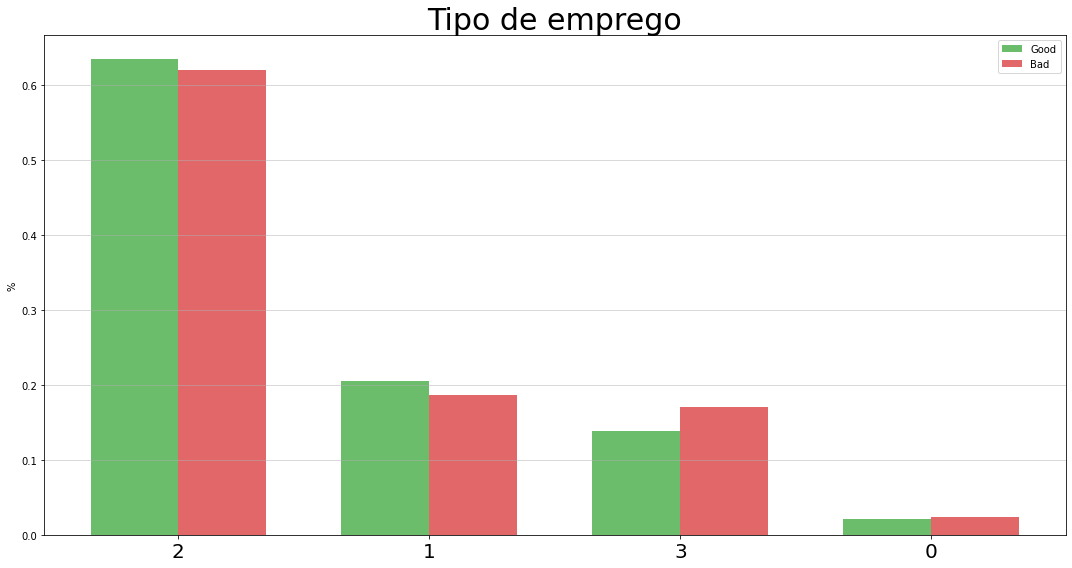

In [228]:
labels = df_german_target.query("Risk == 'good'")['Job'].value_counts().index
good = df_german_target.query("Risk == 'good'")['Job'].value_counts(normalize=True).values
total = df_german_target.query("Risk == 'bad'")['Job'].value_counts().values.sum()
bad = [186/total, 56/total,51/total,7/total]

width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (15,8))

rects1 = ax.bar(x - width/2, good, width, label='Good', color ='tab:green', alpha = 0.7)
rects2 = ax.bar(x + width/2, bad, width, label='Bad', color = 'tab:red', alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('%')
ax.set_title('Tipo de emprego', fontdict={'fontsize':30})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_xticklabels(labels, fontdict={'fontsize':20})


fig.tight_layout()
plt.grid(axis='y', alpha = 0.6)
plt.show()

In [229]:
## CRIAÇÃO DA TABELA DE FREQUÊNCIA

x = df_good_risk['Job'].value_counts()
x.name ='good'
y = df_bad_risk['Job'].value_counts()
y.name ='bad'


freq_table = pd.DataFrame([x,y])


freq_table

,2,1,3,0
good,444,144,97,15
bad,186,56,51,7


In [230]:
stats.chisquare(freq_table)

Power_divergenceResult(statistic=array([105.65714286,  38.72      ,  14.2972973 ,   2.90909091]), pvalue=array([8.76629658e-25, 4.89171027e-10, 1.56088828e-04, 8.80815117e-02]))

Text(0.5, 1.0, 'p-valor')

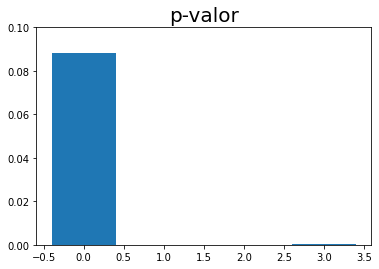

In [231]:
plt.bar(freq_table.columns,stats.chisquare(freq_table)[1])
plt.ylim(top = 0.1)
plt.title('p-valor', fontsize = 20)

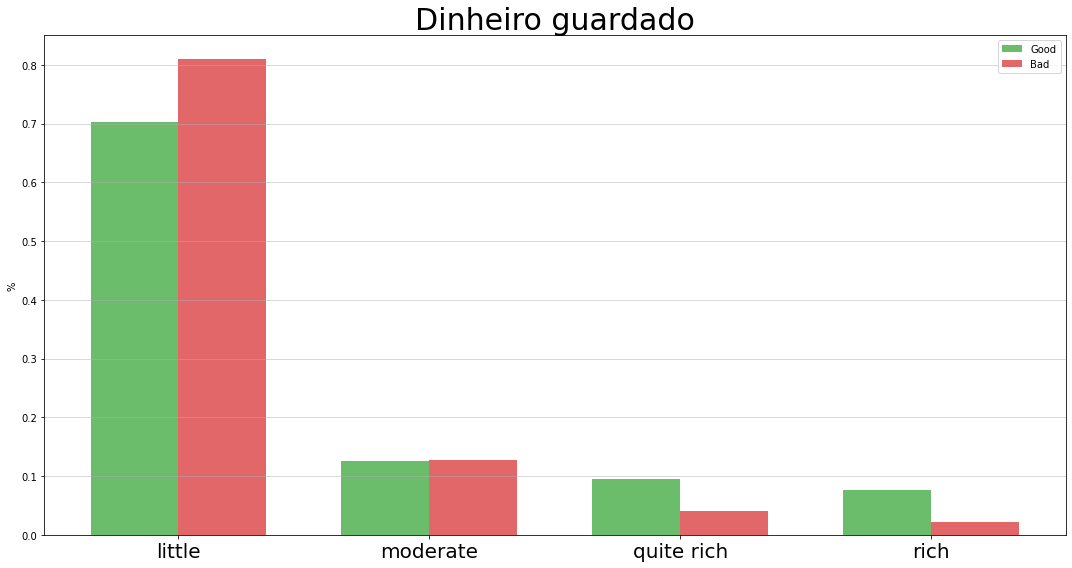

In [232]:
labels = df_german_target.query("Risk == 'good'")['Saving accounts'].value_counts().index
good = df_german_target.query("Risk == 'good'")['Saving accounts'].value_counts(normalize=True).values
total = df_german_target.query("Risk == 'bad'")['Saving accounts'].value_counts().values.sum()
bad = [217/total, 34/total,11/total,6/total]

width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (15,8))

rects1 = ax.bar(x - width/2, good, width, label='Good', color ='tab:green', alpha = 0.7)
rects2 = ax.bar(x + width/2, bad, width, label='Bad', color = 'tab:red', alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('%')
ax.set_title('Dinheiro guardado', fontdict={'fontsize':30})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_xticklabels(labels, fontdict={'fontsize':20})


fig.tight_layout()
plt.grid(axis='y', alpha = 0.6)
plt.show()

In [233]:
## CRIAÇÃO DA TABELA DE FREQUÊNCIA

x = df_good_risk['Saving accounts'].value_counts()
x.name ='good'
y = df_bad_risk['Saving accounts'].value_counts()
y.name ='bad'


freq_table = pd.DataFrame([x,y])


freq_table

,little,moderate,quite rich,rich
good,386,69,52,42
bad,217,34,11,6


Text(0.5, 1.0, 'p-valor')

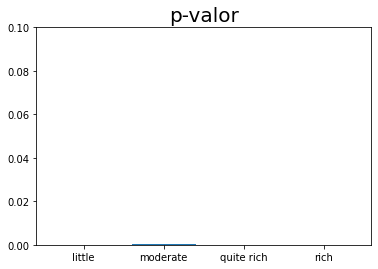

In [234]:
plt.bar(freq_table.columns,stats.chisquare(freq_table)[1])
plt.ylim(top = 0.1)
plt.title('p-valor', fontsize = 20)

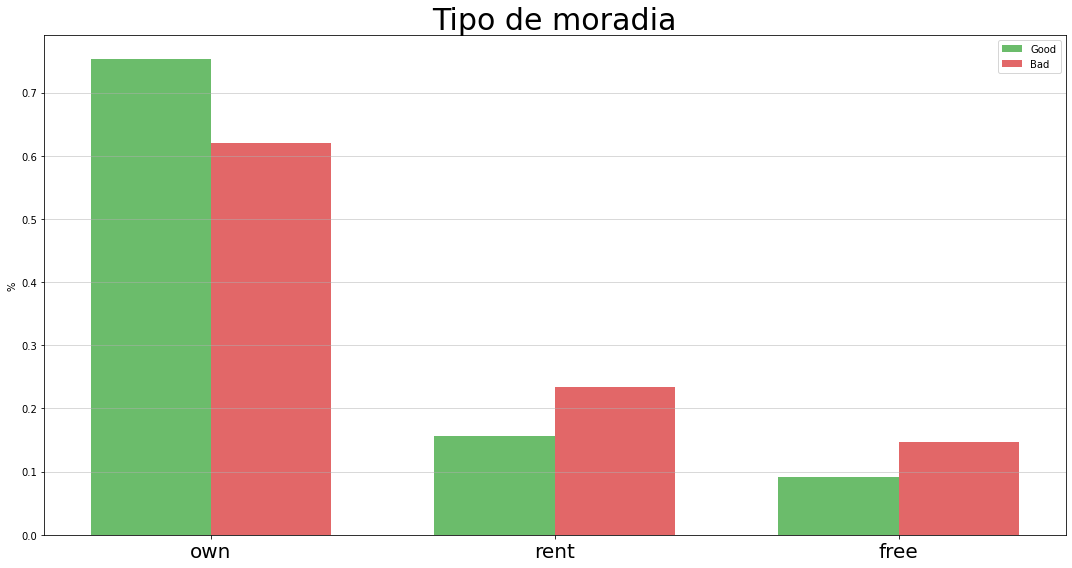

In [235]:
labels = df_german_target.query("Risk == 'good'").Housing.value_counts().index
good = df_german_target.query("Risk == 'good'").Housing.value_counts(normalize=True).values
bad = df_german_target.query("Risk == 'bad'").Housing.value_counts(normalize=True).values

width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (15,8))

rects1 = ax.bar(x - width/2, good, width, label='Good', color ='tab:green', alpha = 0.7)
rects2 = ax.bar(x + width/2, bad, width, label='Bad', color = 'tab:red', alpha = 0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('%')
ax.set_title('Tipo de moradia', fontdict={'fontsize':30})
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'fontsize':20})
ax.legend()



fig.tight_layout()
plt.grid(axis='y', alpha = 0.6)
plt.show()

### Teste de Chi-Quadrado

In [236]:
## CRIAÇÃO DA TABELA DE FREQUÊNCIA

x = df_good_risk['Housing'].value_counts()
x.name ='good'
y = df_bad_risk['Housing'].value_counts()
y.name ='bad'


freq_table = pd.DataFrame([x,y])


freq_table

,own,rent,free
good,527,109,64
bad,186,70,44


Text(0.5, 1.0, 'p-valor')

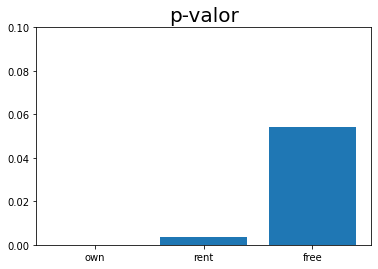

In [237]:
plt.bar(freq_table.columns,stats.chisquare(freq_table)[1])
plt.ylim(top = 0.1)
plt.title('p-valor', fontsize = 20)

In [238]:
stats.chisquare(freq_table)

Power_divergenceResult(statistic=array([163.08695652,   8.4972067 ,   3.7037037 ]), pvalue=array([2.39455314e-37, 3.55692119e-03, 5.42918284e-02]))

# Imputação de dados em registros faltantes

## Saving accounts

### Dados Originais

#### GOOD

In [239]:
## GOOD
df_good_risk['Saving accounts'].isna().sum()

151

In [240]:
x = df_good_risk['Saving accounts'].value_counts(normalize=True)
x.name = 'Originais'
x

little        0.703097
moderate      0.125683
quite rich    0.094718
rich          0.076503
Name: Originais, dtype: float64

In [241]:
## GOOD
round(df_good_risk['Saving accounts'].value_counts(normalize=True) * 151)

little        106.0
moderate       19.0
quite rich     14.0
rich           12.0
Name: Saving accounts, dtype: float64

### Imputação dos *Missings*

In [242]:
## Criando lista para preencher dados ausentes com a mesma proporção da original
list_savings_good = []

for i in range(106):
    list_savings_good.append('little')

for i in range(19):
    list_savings_good.append('moderate')

for i in range(14):
    list_savings_good.append('quite rich')

for i in range(12):
    list_savings_good.append('rich')

len(list_savings_good)

151

In [243]:
series_savings_good = df_good_risk['Saving accounts'].reset_index().drop('index', axis =1)['Saving accounts']

for i in range(len(series_savings_good)):
    value = series_savings_good[i]
    if type(value) == float:
        random.shuffle(list_savings_good)
        fill = list_savings_good.pop(0)
        series_savings_good[i] = fill
    else:
        continue

In [244]:
y = series_savings_good.value_counts(normalize=True)
y.name = 'pós-imputação'
y

little        0.702857
moderate      0.125714
quite rich    0.094286
rich          0.077143
Name: pós-imputação, dtype: float64

In [245]:
# Coparação de resultados
pd.DataFrame([x,y]).T

,Originais,pós-imputação
little,0.703097,0.702857
moderate,0.125683,0.125714
quite rich,0.094718,0.094286
rich,0.076503,0.077143


### BAD

#### Originais

In [246]:
df_bad_risk['Saving accounts'].isna().sum()

32

In [247]:
x = df_bad_risk['Saving accounts'].value_counts(normalize=True)
x.name = 'Originais'
x

little        0.809701
moderate      0.126866
quite rich    0.041045
rich          0.022388
Name: Originais, dtype: float64

In [248]:
round(df_good_risk['Saving accounts'].value_counts(normalize=True) * 32)

little        22.0
moderate       4.0
quite rich     3.0
rich           2.0
Name: Saving accounts, dtype: float64

### Imputação dos *Missings*

In [249]:
## Criando lista para preencher dados ausentes com a mesma proporção da original
list_savings_bad = []

for i in range(23):
    list_savings_bad.append('little')

for i in range(4):
    list_savings_bad.append('moderate')

for i in range(3):
    list_savings_bad.append('quite rich')

for i in range(2):
    list_savings_bad.append('rich')

len(list_savings_bad)

32

In [250]:
series_savings_bad = df_bad_risk['Saving accounts'].reset_index().drop('index', axis =1)['Saving accounts']

for i in range(len(series_savings_bad)):
    value = series_savings_bad[i]
    if type(value) == float:
        random.shuffle(list_savings_bad)
        fill = list_savings_bad.pop(0)
        series_savings_bad[i] = fill
    else:
        continue

In [251]:
y = series_savings_bad.value_counts(normalize=True)
y.name = 'pós-imputação'
y

little        0.800000
moderate      0.126667
quite rich    0.046667
rich          0.026667
Name: pós-imputação, dtype: float64

In [252]:
# Coparação de resultados
pd.DataFrame([x,y]).T

,Originais,pós-imputação
little,0.809701,0.800000
moderate,0.126866,0.126667
quite rich,0.041045,0.046667
rich,0.022388,0.026667


## Checking accounts

### Dados originais

#### GOOD

In [253]:
## GOOD
df_good_risk['Checking account'].isna().sum()

348

In [254]:
x = df_good_risk['Checking account'].value_counts(normalize=True)
x.name = 'Originais'
x

moderate    0.465909
little      0.394886
rich        0.139205
Name: Originais, dtype: float64

In [255]:
## GOOD
round(df_good_risk['Checking account'].value_counts(normalize=True) * 348)

moderate    162.0
little      137.0
rich         48.0
Name: Checking account, dtype: float64

### Imputação nos *Missings*

In [256]:
## Criando lista para preencher dados ausentes com a mesma proporção da original
list_check_good = []

for i in range(163):
    list_check_good.append('moderate')

for i in range(137):
    list_check_good.append('little')

for i in range(48):
    list_check_good.append('rich')

len(list_check_good)

348

In [257]:
series_check_good = df_good_risk['Checking account'].reset_index().drop('index', axis =1)['Checking account']

for i in range(len(series_check_good)):
    value = series_check_good[i]
    if type(value) == float:
        random.shuffle(list_check_good)
        fill = list_check_good.pop(0)
        series_check_good[i] = fill
    else:
        continue

In [258]:
y = series_check_good.value_counts(normalize=True)
y.name = 'pós-imputação'
y

moderate    0.467143
little      0.394286
rich        0.138571
Name: pós-imputação, dtype: float64

In [259]:
# Coparação de resultados
pd.DataFrame([x,y]).T


,Originais,pós-imputação
moderate,0.465909,0.467143
little,0.394886,0.394286
rich,0.139205,0.138571


In [260]:
series_check_good.value_counts()


moderate    327
little      276
rich         97
Name: Checking account, dtype: int64

#### BAD

In [342]:
## Bad
df_bad_risk['Checking account'].isna().sum()

46

In [343]:
x = df_bad_risk['Checking account'].value_counts(normalize=True)
x.name = 'Originais'
x

little      0.531496
moderate    0.413386
rich        0.055118
Name: Originais, dtype: float64

In [344]:
round(df_bad_risk['Checking account'].value_counts(normalize=True) * 46)

little      24.0
moderate    19.0
rich         3.0
Name: Checking account, dtype: float64

In [345]:
## Criando lista para preencher dados ausentes com a mesma proporção da original
list_check_bad = []

for i in range(24):
    list_check_bad.append('moderate')

for i in range(19):
    list_check_bad.append('little')

for i in range(3):
    list_check_bad.append('rich')

len(list_check_bad)

46

In [346]:
series_check_bad = df_bad_risk['Checking account'].reset_index().drop('index', axis =1)['Checking account']

for i in range(len(series_check_bad)):
    value = series_check_bad[i]
    if type(value) == float:
        random.shuffle(list_check_bad)
        fill = list_check_bad.pop(0)
        series_check_bad[i] = fill
    else:
        continue

In [347]:
y = series_check_bad.value_counts(normalize=True)
y.name = 'pós-imputação'
y

little      0.513333
moderate    0.430000
rich        0.056667
Name: pós-imputação, dtype: float64

In [348]:
# Coparação de resultados
pd.DataFrame([x,y]).T

,Originais,pós-imputação
little,0.531496,0.513333
moderate,0.413386,0.430000
rich,0.055118,0.056667


In [349]:
series_check_bad.value_counts()

little      154
moderate    129
rich         17
Name: Checking account, dtype: int64

## Método de imputação 2

In [350]:
uniques = df_good_risk['Saving accounts'].unique()
saving_accounts_good = {}
for i in uniques:
    
    saving_accounts_good[i] = df_good_risk[df_good_risk['Saving accounts'] == i][['Saving accounts','Checking account']]
   

In [351]:
x = saving_accounts_good['little'].value_counts('Checking account')
x.name ='little'

y = saving_accounts_good['moderate'].value_counts('Checking account')
y.name ='moderate'

z = saving_accounts_good['quite rich'].value_counts('Checking account')
z.name ='quite rich'

w = saving_accounts_good['rich'].value_counts('Checking account')
w.name ='rich'

freq_table = pd.DataFrame([x,y,z,w])

# freq_table = freq_table.T
freq_table['Total'] = freq_table.sum(axis =1)
# freq_table = freq_table.T
freq_table



,little,moderate,rich,Total
little,105,85,31,221
moderate,7,23,4,34
quite rich,6,8,3,17
rich,6,10,3,19


In [352]:
## Tabela de frequência esperada
freq_esperada = freq_table.apply(lambda x: x/ freq_table['Total']).T
freq_esperada

,little,moderate,quite rich,rich
little,0.475113,0.205882,0.352941,0.315789
moderate,0.384615,0.676471,0.470588,0.526316
rich,0.140271,0.117647,0.176471,0.157895
Total,1.000000,1.000000,1.000000,1.000000


In [353]:
df_good_risk['Checking account'].isna().sum()

348

In [354]:
round(df_good_risk['Checking account'].value_counts(normalize = True) * 348)

moderate    162.0
little      137.0
rich         48.0
Name: Checking account, dtype: float64

In [355]:
round(freq_esperada['little'] * 100)

little       48.0
moderate     38.0
rich         14.0
Total       100.0
Name: little, dtype: float64

In [356]:
good_risk_little = []

for i in range(48):
    good_risk_little.append('little')
for i in range(38):
    good_risk_little.append('moderate')
for i in range(14):
    good_risk_little.append('rich')

len(good_risk_little)

100

In [357]:
round(freq_esperada['moderate'] * 100)

little       21.0
moderate     68.0
rich         12.0
Total       100.0
Name: moderate, dtype: float64

In [358]:
good_risk_moderate = []

for i in range(21):
    good_risk_moderate.append('little')
for i in range(68):
    good_risk_moderate.append('moderate')
for i in range(12):
    good_risk_moderate.append('rich')

len(good_risk_moderate)

101

In [359]:
round(freq_esperada['quite rich'] * 100)

little       35.0
moderate     47.0
rich         18.0
Total       100.0
Name: quite rich, dtype: float64

In [360]:
good_risk_quite_rich = []

for i in range(35):
    good_risk_quite_rich.append('little')
for i in range(47):
    good_risk_quite_rich.append('moderate')
for i in range(18):
    good_risk_quite_rich.append('rich')

len(good_risk_quite_rich)

100

In [361]:
round(freq_esperada['rich'] * 100)

little       32.0
moderate     53.0
rich         16.0
Total       100.0
Name: rich, dtype: float64

In [362]:
good_risk_rich = []

for i in range(35):
    good_risk_rich.append('little')
for i in range(47):
    good_risk_rich.append('moderate')
for i in range(18):
    good_risk_rich.append('rich')

len(good_risk_rich)

100

In [363]:
u = pd.DataFrame(data = [series_savings_good.values, df_good_risk['Checking account'].values]).T
u.columns = ['Saving accounts', 'Checking account']
u 

,Saving accounts,Checking account
0,little,little
1,little,NaN
2,little,little
3,little,NaN
4,quite rich,NaN
...,...,...
695,little,NaN
696,little,NaN
697,little,little
698,little,NaN


In [364]:
u.isna().sum()

Saving accounts       0
Checking account    348
dtype: int64

In [365]:
def imput_2_good(x):
    ''' Retorna Series preenchida
    '''
    for i in range(700):
        if x['Saving accounts'][i] == 'little':
            random.shuffle(good_risk_little)
            x['Checking account'][i] = good_risk_little[0]

        elif x['Saving accounts'][i] == 'moderate':
            random.shuffle(good_risk_moderate)
            x['Checking account'][i] = good_risk_moderate[0]
        
        elif x['Saving accounts'][i] == 'quite rich':
            random.shuffle(good_risk_quite_rich)
            x['Checking account'][i] = good_risk_quite_rich[0]

        elif x['Saving accounts'][i] == 'quite rich':
            random.shuffle(good_risk_rich)
            x['Checking account'][i] = good_risk_rich[0]

        else:
            continue

    return x['Checking account']
        

In [366]:
imput_2_good(u)

0          rich
1      moderate
2        little
3          rich
4        little
         ...   
695        rich
696    moderate
697    moderate
698      little
699    moderate
Name: Checking account, Length: 700, dtype: object

In [367]:
series_check_good_imput_2 = imput_2_good(u)

## BAD

In [368]:
uniques = df_bad_risk['Saving accounts'].unique()
saving_accounts_bad = {}
for i in uniques:
    
    saving_accounts_bad[i] = df_bad_risk[df_bad_risk['Saving accounts'] == i][['Saving accounts','Checking account']]

In [369]:
x = saving_accounts_bad['little'].value_counts('Checking account')
x.name ='little'

y = saving_accounts_bad['moderate'].value_counts('Checking account')
y.name ='moderate'

z = saving_accounts_bad['quite rich'].value_counts('Checking account')
z.name ='quite rich'

w = saving_accounts_bad['rich'].value_counts('Checking account')
w.name ='rich'

freq_table = pd.DataFrame([x,y,z,w])

# freq_table = freq_table.T
freq_table['Total'] = freq_table.sum(axis =1)
# freq_table = freq_table.T
freq_table

,little,moderate,rich,Total
little,114.0,67.0,10.0,191.0
moderate,5.0,24.0,1.0,30.0
quite rich,2.0,3.0,1.0,6.0
rich,NaN,4.0,NaN,4.0


In [370]:
## Tabela de frequência esperada
freq_esperada = freq_table.apply(lambda x: x/ freq_table['Total']).T
freq_esperada

,little,moderate,quite rich,rich
little,0.596859,0.166667,0.333333,NaN
moderate,0.350785,0.800000,0.500000,1.0
rich,0.052356,0.033333,0.166667,NaN
Total,1.000000,1.000000,1.000000,1.0


In [371]:
df_bad_risk['Checking account'].isna().sum()

46

In [372]:
round(df_bad_risk['Checking account'].value_counts(normalize = True) * 46)

little      24.0
moderate    19.0
rich         3.0
Name: Checking account, dtype: float64

In [373]:
round(freq_esperada['little'] * 100)

little       60.0
moderate     35.0
rich          5.0
Total       100.0
Name: little, dtype: float64

In [374]:
bad_risk_little = []

for i in range(60):
    bad_risk_little.append('little')
for i in range(35):
    bad_risk_little.append('moderate')
for i in range(5):
    bad_risk_little.append('rich')

len(bad_risk_little)

100

In [375]:
round(freq_esperada['moderate'] * 100)

little       17.0
moderate     80.0
rich          3.0
Total       100.0
Name: moderate, dtype: float64

In [376]:
bad_risk_moderate = []

for i in range(17):
    bad_risk_moderate.append('little')
for i in range(80):
    bad_risk_moderate.append('moderate')
for i in range(3):
    bad_risk_moderate.append('rich')

len(bad_risk_moderate)

100

In [377]:
round(freq_esperada['quite rich'] * 100)

little       33.0
moderate     50.0
rich         17.0
Total       100.0
Name: quite rich, dtype: float64

In [378]:
bad_risk_quite_rich = []

for i in range(33):
    bad_risk_quite_rich.append('little')
for i in range(50):
    bad_risk_quite_rich.append('moderate')
for i in range(17):
    bad_risk_quite_rich.append('rich')

len(bad_risk_quite_rich)

100

In [379]:
round(freq_esperada['rich'] * 100)

little        NaN
moderate    100.0
rich          NaN
Total       100.0
Name: rich, dtype: float64

In [380]:
bad_risk_rich = []

for i in range(100):
    bad_risk_rich.append('moderate')


len(bad_risk_rich)

100

In [381]:
u = pd.DataFrame(data = [series_savings_bad.values, df_bad_risk['Checking account'].values]).T
u.columns = ['Saving accounts', 'Checking account']
u 

,Saving accounts,Checking account
0,little,moderate
1,little,little
2,little,moderate
3,little,moderate
4,little,little
...,...,...
295,moderate,moderate
296,little,moderate
297,little,NaN
298,little,little


In [382]:
u.isna().sum()

Saving accounts      0
Checking account    46
dtype: int64

In [383]:
def imput_2_bad(x):
    ''' Retorna Series preenchida
    '''
    for i in range(300):
        if x['Saving accounts'][i] == 'little':
            random.shuffle(bad_risk_little)
            x['Checking account'][i] = bad_risk_little[0]

        elif x['Saving accounts'][i] == 'moderate':
            random.shuffle(bad_risk_moderate)
            x['Checking account'][i] = bad_risk_moderate[0]
        
        elif x['Saving accounts'][i] == 'quite rich':
            random.shuffle(bad_risk_quite_rich)
            x['Checking account'][i] = bad_risk_quite_rich[0]

        elif x['Saving accounts'][i] == 'rich':
            random.shuffle(bad_risk_rich)
            x['Checking account'][i] = bad_risk_rich[0]

        else:
            continue

    return x['Checking account']
        

In [384]:
imput_2_bad(u)

0      moderate
1        little
2        little
3        little
4        little
         ...   
295      little
296      little
297      little
298      little
299      little
Name: Checking account, Length: 300, dtype: object

In [385]:
series_check_bad_imput_2 =imput_2_bad(u)

## Criando Tabela com dados preenchidos

In [386]:
## Criando cópias das bases
df_good_risk_fill = df_good_risk.copy()
df_bad_risk_fill = df_bad_risk.copy()

df_good_risk_fill['Saving accounts'] = series_savings_good.values
df_bad_risk_fill['Saving accounts'] = series_savings_bad.values

df_good_risk_fill['Checking account'] = series_check_good.values
df_bad_risk_fill['Checking account'] = series_check_bad.values

df_german_full = pd.concat([df_good_risk_fill,df_bad_risk_fill], ignore_index=True)

df_german_full


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,49,male,1,own,little,little,2096,12,education,good
2,45,male,2,free,little,little,7882,42,furniture/equipment,good
3,35,male,1,free,little,rich,9055,36,education,good
4,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
995,25,male,2,rent,moderate,moderate,1264,15,car,bad
996,49,male,2,own,little,moderate,8386,30,furniture/equipment,bad
997,33,male,3,rent,little,rich,4844,48,business,bad
998,26,male,2,own,little,little,8229,36,car,bad


In [387]:
## Criando cópias das bases
x = df_good_risk.copy()
y = df_bad_risk.copy()

x['Saving accounts'] = series_savings_good.values
y['Saving accounts'] = series_savings_bad.values

x['Checking account'] = series_check_good_imput_2.values
y['Checking account'] = series_check_bad_imput_2.values

df_german_test = pd.concat([x,y], ignore_index=True)

df_german_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,49,male,1,own,little,little,2096,12,education,good
2,45,male,2,free,little,little,7882,42,furniture/equipment,good
3,35,male,1,free,little,little,9055,36,education,good
4,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
995,25,male,2,rent,moderate,moderate,1264,15,car,bad
996,49,male,2,own,little,little,8386,30,furniture/equipment,bad
997,33,male,3,rent,little,little,4844,48,business,bad
998,26,male,2,own,little,little,8229,36,car,bad


In [388]:
df_german_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


# Seleção das *Features*

In [389]:
quali = df_german_full[['Sex','Housing','Saving accounts','Checking account','Purpose']]
quanti = df_german_full[['Age','Credit amount','Duration']]
df_german_full['Target'] = pd.factorize(df_german_full.Risk, sort=True)[0]
target = df_german_full['Target']
df_german_full

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,little,little,1169,6,radio/TV,good,1
1,49,male,1,own,little,little,2096,12,education,good,1
2,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
3,35,male,1,free,little,rich,9055,36,education,good,1
4,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good,1
...,...,...,...,...,...,...,...,...,...,...,...
995,25,male,2,rent,moderate,moderate,1264,15,car,bad,0
996,49,male,2,own,little,moderate,8386,30,furniture/equipment,bad,0
997,33,male,3,rent,little,rich,4844,48,business,bad,0
998,26,male,2,own,little,little,8229,36,car,bad,0


In [390]:
quali_test = df_german_test[['Sex','Housing','Saving accounts','Checking account','Purpose']]
quanti = df_german_test[['Age','Credit amount','Duration']]
df_german_test['Target'] = pd.factorize(df_german_test.Risk, sort=True)[0]
target_test = df_german_test['Target']
df_german_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,little,little,1169,6,radio/TV,good,1
1,49,male,1,own,little,little,2096,12,education,good,1
2,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
3,35,male,1,free,little,little,9055,36,education,good,1
4,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good,1
...,...,...,...,...,...,...,...,...,...,...,...
995,25,male,2,rent,moderate,moderate,1264,15,car,bad,0
996,49,male,2,own,little,little,8386,30,furniture/equipment,bad,0
997,33,male,3,rent,little,little,4844,48,business,bad,0
998,26,male,2,own,little,little,8229,36,car,bad,0


In [391]:
## Transforamndo variáveis categóricas em inteiros
quali_fact_test = pd.DataFrame()
quali_fact_test_dict = {}

for i in quali_test.columns:
    quali_fact_test[i] = pd.factorize(quali_test[i])[0]
    quali_fact_test_dict[i] = pd.factorize(quali_test[i])[1]

quali_fact_test['Saving accounts']=df_german_test['Saving accounts'].map({np.nan: -1,'little':0,'moderate':1,'quite rich':2,'rich':3})
quali_fact_test['Job'] = df_german_test['Job']
quanti_fact_test = df_german_test[['Age','Credit amount','Duration']]

# df_teste = pd.concat(quali_fact_test,quanti_fact_test )

df_teste = pd.merge(quali_fact_test,quanti_fact_test, on= quali_fact_test.index).drop('key_0', axis =1)
df_teste['Target']= df_german_test['Target']

df_teste

,Sex,Housing,Saving accounts,Checking account,Purpose,Job,Age,Credit amount,Duration,Target
0,0,0,0,0,0,2,67,1169,6,1
1,0,0,0,0,1,1,49,2096,12,1
2,0,1,0,0,2,2,45,7882,42,1
3,0,1,0,0,1,1,35,9055,36,1
4,0,0,2,0,2,2,53,2835,24,1
...,...,...,...,...,...,...,...,...,...,...
995,0,2,1,1,3,2,25,1264,15,0
996,0,0,0,0,2,2,49,8386,30,0
997,0,2,0,0,4,3,33,4844,48,0
998,0,0,0,0,3,2,26,8229,36,0


In [392]:
df_german_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,little,little,1169,6,radio/TV,good,1
1,49,male,1,own,little,little,2096,12,education,good,1
2,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
3,35,male,1,free,little,little,9055,36,education,good,1
4,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good,1
...,...,...,...,...,...,...,...,...,...,...,...
995,25,male,2,rent,moderate,moderate,1264,15,car,bad,0
996,49,male,2,own,little,little,8386,30,furniture/equipment,bad,0
997,33,male,3,rent,little,little,4844,48,business,bad,0
998,26,male,2,own,little,little,8229,36,car,bad,0


## Variáveis Categóricas

In [393]:
## Transforamndo variáveis categóricas em inteiros
quali_fact = pd.DataFrame()
quali_fact_dict = {}

for i in quali.columns:
    quali_fact[i] = pd.factorize(quali[i])[0]
    quali_fact_dict[i] = pd.factorize(quali[i])[1]

quali_fact['Saving accounts']=df_german_full['Saving accounts'].map({np.nan: -1,'little':0,'moderate':1,'quite rich':2,'rich':3})
quali_fact['Job'] = df_german_full['Job']
quanti = df_german_full[['Age', 'Credit amount', 'Duration']]
quali_fact

,Sex,Housing,Saving accounts,Checking account,Purpose,Job
0,0,0,0,0,0,2
1,0,0,0,0,1,1
2,0,1,0,0,2,2
3,0,1,0,1,1,1
4,0,0,2,0,2,2
...,...,...,...,...,...,...
995,0,2,1,2,3,2
996,0,0,0,2,2,2
997,0,2,0,1,4,3
998,0,0,0,0,3,2


### Selecionando *features* categóricas pelo Chi-Quadrado

In [394]:
## Selecionando 
f_chi2 = SelectKBest(chi2, k=4)

In [395]:
fit = f_chi2.fit(quali_fact, target)

In [396]:
## Features categóricas escolhidas
cols = fit.get_support(indices=True)

x = quali_fact.iloc[:,cols]
quali.iloc[:,cols]

,Housing,Saving accounts,Checking account,Purpose
0,own,little,little,radio/TV
1,own,little,little,education
2,free,little,little,furniture/equipment
3,free,little,rich,education
4,own,quite rich,little,furniture/equipment
...,...,...,...,...
995,rent,moderate,moderate,car
996,own,little,moderate,furniture/equipment
997,rent,little,rich,business
998,own,little,little,car


## Variáveis Contínuas

### Selecionando pela ANOVA

In [397]:
f_class = SelectKBest(f_classif, k=2)

In [398]:
f_class

SelectKBest(k=2)

In [399]:
fit_2 = f_class.fit(quanti,target)

In [400]:
cols = fit_2.get_support(indices=True)

y = quanti.iloc[:,cols]

## *Features* escolhidas

In [401]:
df_features = x.merge(y,left_index=True,right_index=True)

df_features

,Housing,Saving accounts,Checking account,Purpose,Credit amount,Duration
0,0,0,0,0,1169,6
1,0,0,0,1,2096,12
2,1,0,0,2,7882,42
3,1,0,1,1,9055,36
4,0,2,0,2,2835,24
...,...,...,...,...,...,...
995,2,1,2,3,1264,15
996,0,0,2,2,8386,30
997,2,0,1,4,4844,48
998,0,0,0,3,8229,36


In [402]:
features_test = df_teste[df_features.columns]
target_test = df_teste['Target']

In [403]:
features_test.corr(method='spearman')

,Housing,Saving accounts,Checking account,Purpose,Credit amount,Duration
Housing,1.000000,0.003165,0.000238,0.054476,0.090845,0.032870
Saving accounts,0.003165,1.000000,0.047105,0.050320,-0.026459,0.007518
Checking account,0.000238,0.047105,1.000000,-0.053251,-0.079402,-0.076927
Purpose,0.054476,0.050320,-0.053251,1.000000,0.182061,0.115248
Credit amount,0.090845,-0.026459,-0.079402,0.182061,1.000000,0.624709
Duration,0.032870,0.007518,-0.076927,0.115248,0.624709,1.000000


In [404]:
df_features.corr(method='spearman')

,Housing,Saving accounts,Checking account,Purpose,Credit amount,Duration
Housing,1.000000,0.003165,-0.070239,0.054476,0.090845,0.032870
Saving accounts,0.003165,1.000000,0.119156,0.050320,-0.026459,0.007518
Checking account,-0.070239,0.119156,1.000000,0.007706,0.047659,0.017871
Purpose,0.054476,0.050320,0.007706,1.000000,0.182061,0.115248
Credit amount,0.090845,-0.026459,0.047659,0.182061,1.000000,0.624709
Duration,0.032870,0.007518,0.017871,0.115248,0.624709,1.000000


## Modelos Preditivos

### Definindo modelos

In [405]:
RL = LogisticRegression()
RL

LogisticRegression()

In [406]:
DT = DecisionTreeClassifier()
DT 

DecisionTreeClassifier()

In [407]:
RF = RandomForestClassifier(n_estimators=10)
RF 

RandomForestClassifier(n_estimators=10)

In [408]:
GNB = GaussianNB()
GNB

GaussianNB()

# Resultados

In [452]:
quanti['Target'] = target

In [453]:
quanti.corr(method= 'spearman')['Target']

Age              0.112191
Credit amount   -0.087083
Duration        -0.205685
Target           1.000000
Name: Target, dtype: float64

In [454]:
models_scores = pd.DataFrame()

0.732


[[  9  57]
 [ 10 174]]


              precision    recall  f1-score   support

           0       0.47      0.14      0.21        66
           1       0.75      0.95      0.84       184

    accuracy                           0.73       250
   macro avg       0.61      0.54      0.53       250
weighted avg       0.68      0.73      0.67       250



<AxesSubplot:title={'center':'ERROS'}>

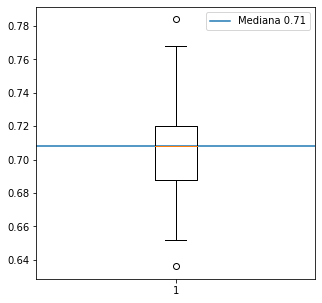

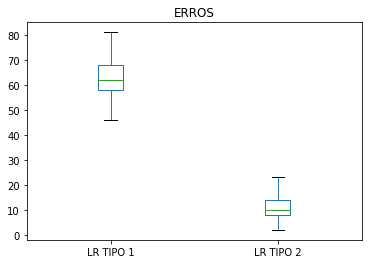

In [455]:
## Regressão Logística
score = []
erros = pd.DataFrame()
erro_tipo_1 = []
erro_tipo_2 = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(df_features, target,test_size = 0.25)
    RL.fit(X_train, Y_train)
    Y_pred = RL.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))
    erro_tipo_1.append(confusion_matrix(Y_test, Y_pred)[0,1])
    erro_tipo_2.append(confusion_matrix(Y_test, Y_pred)[1,0])

print(accuracy_score(Y_test,Y_pred))
print("\n")
print(confusion_matrix(Y_test, Y_pred))
print("\n")
print(classification_report(Y_test, Y_pred))

plt.figure(figsize = (5,5))
plt.axhline(np.median(score), label =f'Mediana {round(np.median(score),2)}')
plt.legend()
plt.boxplot(score);
models_scores['LR'] = score

erros['LR TIPO 1'] = erro_tipo_1
erros['LR TIPO 2'] = erro_tipo_2

LR_erros = erros
LR_erros.name = 'LR'
erros.plot.box(title = 'ERROS')

0.648


[[ 39  39]
 [ 49 123]]


              precision    recall  f1-score   support

           0       0.44      0.50      0.47        78
           1       0.76      0.72      0.74       172

    accuracy                           0.65       250
   macro avg       0.60      0.61      0.60       250
weighted avg       0.66      0.65      0.65       250



<AxesSubplot:title={'center':'ERROS'}>

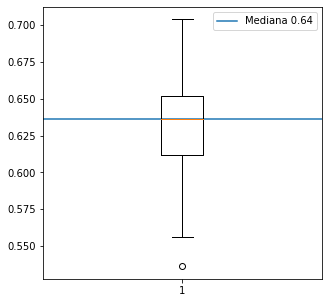

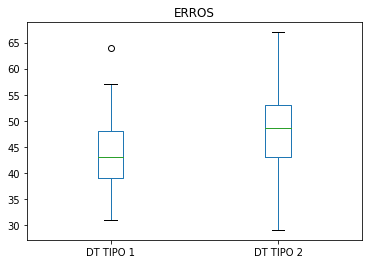

In [456]:
score = []
erros = pd.DataFrame()
erro_tipo_1 = []
erro_tipo_2 = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(df_features, target,test_size = 0.25)
    DT.fit(X_train, Y_train)
    Y_pred = DT.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))
    erro_tipo_1.append(confusion_matrix(Y_test, Y_pred)[0,1])
    erro_tipo_2.append(confusion_matrix(Y_test, Y_pred)[1,0])


print(accuracy_score(Y_test,Y_pred))
print("\n")
print(confusion_matrix(Y_test, Y_pred))
print("\n")
print(classification_report(Y_test, Y_pred))

plt.figure(figsize = (5,5))
plt.axhline(np.median(score), label =f'Mediana {round(np.median(score),2)}')
plt.legend()
plt.boxplot(score);

models_scores['DT'] = score
erros['DT TIPO 1'] = erro_tipo_1
erros['DT TIPO 2'] = erro_tipo_2

DT_erros = erros 
DT_erros.name = 'DT'
erros.plot.box(title = 'ERROS')

0.72


[[ 43  36]
 [ 34 137]]


              precision    recall  f1-score   support

           0       0.56      0.54      0.55        79
           1       0.79      0.80      0.80       171

    accuracy                           0.72       250
   macro avg       0.68      0.67      0.67       250
weighted avg       0.72      0.72      0.72       250



<AxesSubplot:title={'center':'ERROS'}>

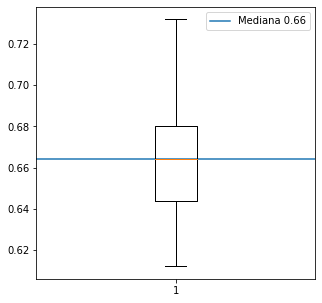

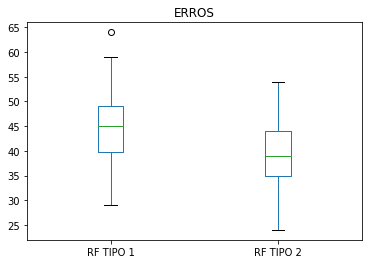

In [457]:
score = []
erros = pd.DataFrame()
erro_tipo_1 = []
erro_tipo_2 = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(df_features, target,test_size = 0.25)
    RF.fit(X_train, Y_train)
    Y_pred = RF.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))
    erro_tipo_1.append(confusion_matrix(Y_test, Y_pred)[0,1])
    erro_tipo_2.append(confusion_matrix(Y_test, Y_pred)[1,0])


print(accuracy_score(Y_test,Y_pred))
print("\n")
print(confusion_matrix(Y_test, Y_pred))
print("\n")
print(classification_report(Y_test, Y_pred))

plt.figure(figsize = (5,5))
plt.axhline(np.median(score), label =f'Mediana {round(np.median(score),2)}')
plt.legend()
plt.boxplot(score);
models_scores['RF'] = score

erros['RF TIPO 1'] = erro_tipo_1
erros['RF TIPO 2'] = erro_tipo_2

RF_erros = erros 
RF_erros.name = 'RF'

erros.plot.box(title = 'ERROS')

0.712


[[ 28  41]
 [ 31 150]]


              precision    recall  f1-score   support

           0       0.47      0.41      0.44        69
           1       0.79      0.83      0.81       181

    accuracy                           0.71       250
   macro avg       0.63      0.62      0.62       250
weighted avg       0.70      0.71      0.70       250



<AxesSubplot:title={'center':'ERROS'}>

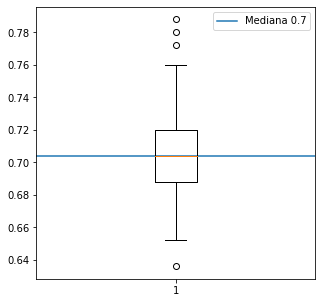

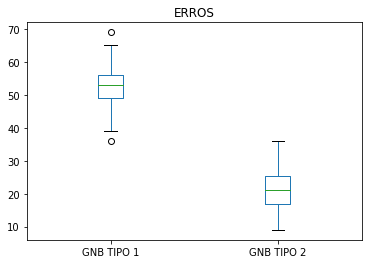

In [458]:
score = []
erros = pd.DataFrame()
erro_tipo_1 = []
erro_tipo_2 = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(df_features, target,test_size = 0.25)
    GNB.fit(X_train, Y_train)
    Y_pred = GNB.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))
    erro_tipo_1.append(confusion_matrix(Y_test, Y_pred)[0,1])
    erro_tipo_2.append(confusion_matrix(Y_test, Y_pred)[1,0])



print(accuracy_score(Y_test,Y_pred))
print("\n")
print(confusion_matrix(Y_test, Y_pred))
print("\n")
print(classification_report(Y_test, Y_pred))

plt.figure(figsize = (5,5))
plt.axhline(np.median(score), label =f'Mediana {round(np.median(score),2)}')
plt.legend()
plt.boxplot(score);
models_scores['GNB'] = score

erros['GNB TIPO 1'] = erro_tipo_1
erros['GNB TIPO 2'] = erro_tipo_2

GNB_erros = erros 
GNB_erros.name = 'GNB'

erros.plot.box(title = 'ERROS')

<AxesSubplot:title={'center':'Comparação de scores de modelos'}>

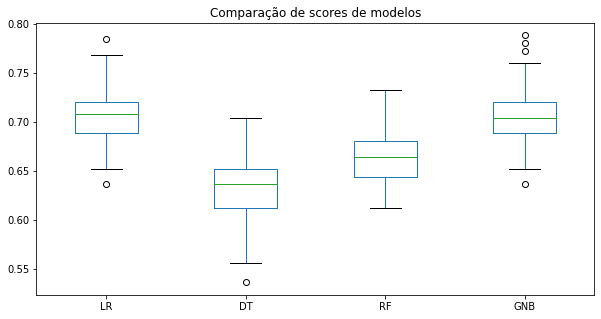

In [459]:
models_scores.plot.box(figsize = (10,5), title = "Comparação de scores de modelos")

In [460]:
LR_erros

,LR TIPO 1,LR TIPO 2
0,54,16
1,61,9
2,69,9
3,69,9
4,46,17
...,...,...
95,46,12
96,75,3
97,68,11
98,51,13


Text(0.5, 1.0, 'Erros dos modelos por tipo')

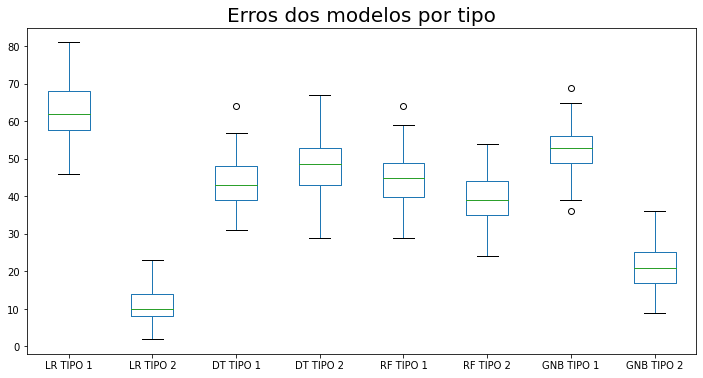

In [461]:
pd.concat([LR_erros,DT_erros, RF_erros,GNB_erros], axis=1).plot.box(figsize = (12,6))
plt.title('Erros dos modelos por tipo', fontsize = 20)